# Download Dataset

In [21]:
#  !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [22]:
# !unzip -qq cats_and_dogs_filtered.zip

In [23]:

# !sudo apt-get install tree
# !tree -L 2 cats_and_dogs_filtered 

# Load From Paths

In [24]:
import os

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print(base_dir,train_dir,validation_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

cats_and_dogs_filtered cats_and_dogs_filtered/train cats_and_dogs_filtered/validation


In [25]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:5])

['cat.277.jpg', 'cat.420.jpg', 'cat.32.jpg', 'cat.375.jpg', 'cat.816.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']


In [26]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


# Sample Image View

In [27]:
import matplotlib.pyplot as plt
from matplotlib import image
import random

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

number_image_to_take = 4
cat_images = [os.path.join(train_cats_dir, file_name)
                for file_name in random.sample(os.listdir(train_cats_dir), number_image_to_take)]

dog_images = [os.path.join(train_dogs_dir, file_name)
                for file_name in random.sample(os.listdir(train_dogs_dir), number_image_to_take)]

print('cats:', cat_images)
print('dogs:', dog_images)
images = cat_images + dog_images
# print('total image', len(images))

cats: ['cats_and_dogs_filtered/train/cats/cat.863.jpg', 'cats_and_dogs_filtered/train/cats/cat.445.jpg', 'cats_and_dogs_filtered/train/cats/cat.907.jpg', 'cats_and_dogs_filtered/train/cats/cat.578.jpg']
dogs: ['cats_and_dogs_filtered/train/dogs/dog.649.jpg', 'cats_and_dogs_filtered/train/dogs/dog.847.jpg', 'cats_and_dogs_filtered/train/dogs/dog.702.jpg', 'cats_and_dogs_filtered/train/dogs/dog.684.jpg']


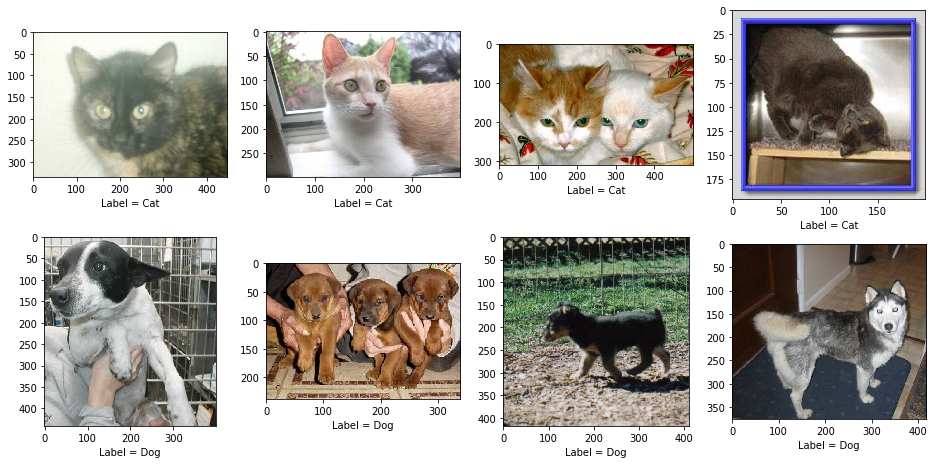

In [28]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(images):
  plt.subplot(nrows, ncols, i+1)
  img = image.imread(img_path)
  plt.imshow(img)
  if i < number_image_to_take:
    plt.xlabel('Label = Cat')
  else:
    plt.xlabel('Label = Dog')

plt.show()

# Model Building

In [29]:
from warnings import filterwarnings
filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=2,activation='sigmoid'))

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [31]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,               # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [32]:
#print(*train_generator)

In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 7s - loss: 0.6942 - accuracy: 0.5350 - val_loss: 0.6843 - val_accuracy: 0.5370 - 7s/epoch - 67ms/step
Epoch 2/15
100/100 - 6s - loss: 0.6649 - accuracy: 0.6195 - val_loss: 0.6545 - val_accuracy: 0.6210 - 6s/epoch - 59ms/step
Epoch 3/15
100/100 - 6s - loss: 0.6561 - accuracy: 0.6270 - val_loss: 0.6503 - val_accuracy: 0.6300 - 6s/epoch - 59ms/step
Epoch 4/15
100/100 - 6s - loss: 0.6361 - accuracy: 0.6350 - val_loss: 0.6311 - val_accuracy: 0.6490 - 6s/epoch - 59ms/step
Epoch 5/15
100/100 - 6s - loss: 0.6024 - accuracy: 0.6745 - val_loss: 0.6336 - val_accuracy: 0.6460 - 6s/epoch - 60ms/step
Epoch 6/15
100/100 - 6s - loss: 0.5588 - accuracy: 0.7185 - val_loss: 0.5907 - val_accuracy: 0.6930 - 6s/epoch - 60ms/step
Epoch 7/15
100/100 - 6s - loss: 0.5382 - accuracy: 0.7340 - val_loss: 0.6387 - val_accuracy: 0.6670 - 6s/epoch - 63ms/step
Epoch 8/15
100/100 - 6s - loss: 0.5313 - accuracy: 0.7325 - val_loss: 0.6285 - val_accuracy: 0.6410 - 6s/epoch - 64ms/step
Epoch 9/15
100/1

# Evaluation

In [34]:
batch = next(validation_generator)
print('type of batch :', type(batch))
print('batch length  :', len(batch))
print('type batch[0] :', type(batch[0]))
print('type batch[1] :', type(batch[1]))

print('shape batch[0]:', batch[0].shape)
print('shape batch[1]:', batch[1].shape)

# evaluate model
_, acc = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)
print('Accuracy: %.3f' % (acc * 100.0))

type of batch : <class 'tuple'>
batch length  : 2
type batch[0] : <class 'numpy.ndarray'>
type batch[1] : <class 'numpy.ndarray'>
shape batch[0]: (20, 64, 64, 3)
shape batch[1]: (20, 2)
Accuracy: 71.600


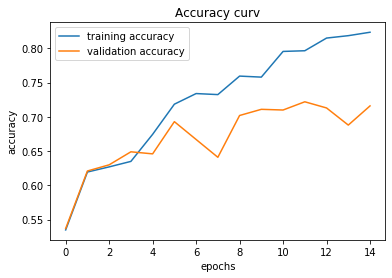

In [35]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy curv')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

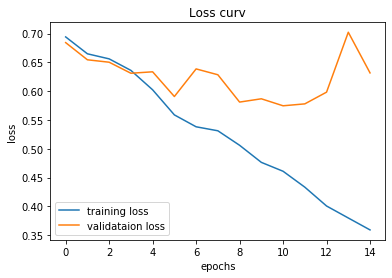

In [36]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validataion loss')
plt.title('Loss curv')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

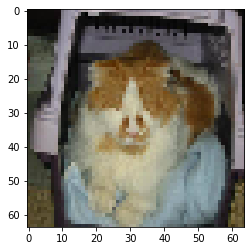

In [37]:
image_index = 5
test_image = batch[0][image_index]
plt.imshow(test_image)
plt.show()